In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [14]:
data = pd.read_csv('insurance.csv')

In [15]:
print(data.shape)

(1338, 7)


In [16]:
print(data.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [17]:
print(data.isna().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [18]:
print(data.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


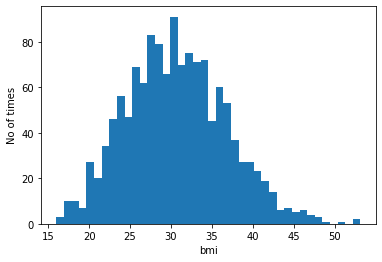

In [19]:
plt.hist(data['bmi'], bins=40)
plt.xlabel('bmi')
plt.ylabel('No of times')
plt.show()

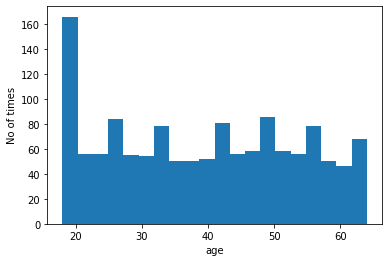

In [20]:
plt.hist(data['age'], bins=20)
plt.xlabel('age')
plt.ylabel('No of times')
plt.show()

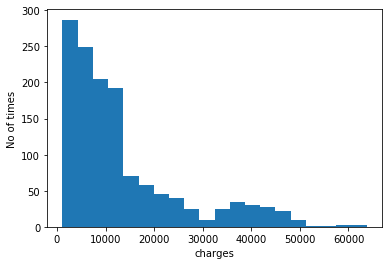

In [21]:
plt.hist(data['charges'], bins=20)
plt.xlabel('charges')
plt.ylabel('No of times')
plt.show()

In [22]:
print(data.skew(axis = 0, skipna = True)) 

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64


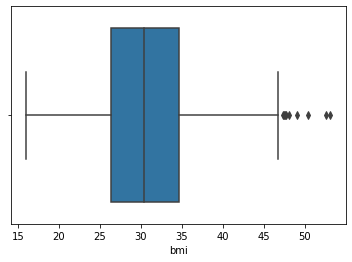

In [23]:
sns.boxplot(x=data['bmi'])

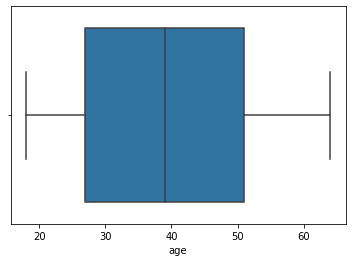

In [24]:
sns.boxplot(x=data['age'])

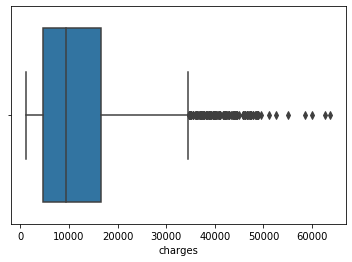

In [25]:
sns.boxplot(x=data['charges'])

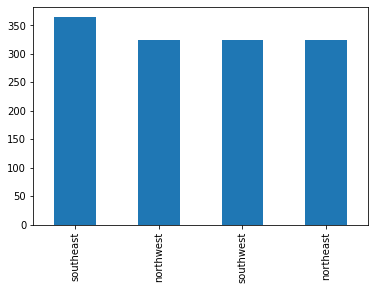

In [26]:
data['region'].value_counts().plot('bar')

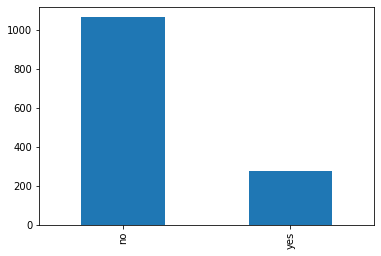

In [27]:
data['smoker'].value_counts().plot('bar')

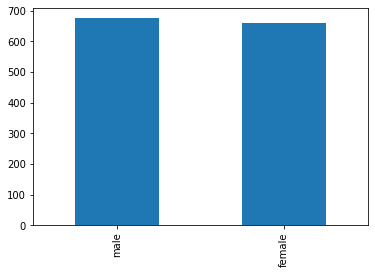

In [28]:
data['sex'].value_counts().plot('bar')

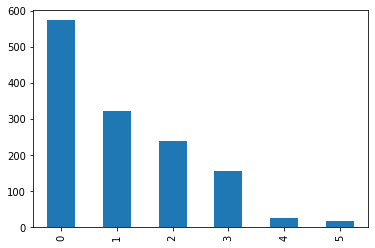

In [29]:
data['children'].value_counts().plot('bar')

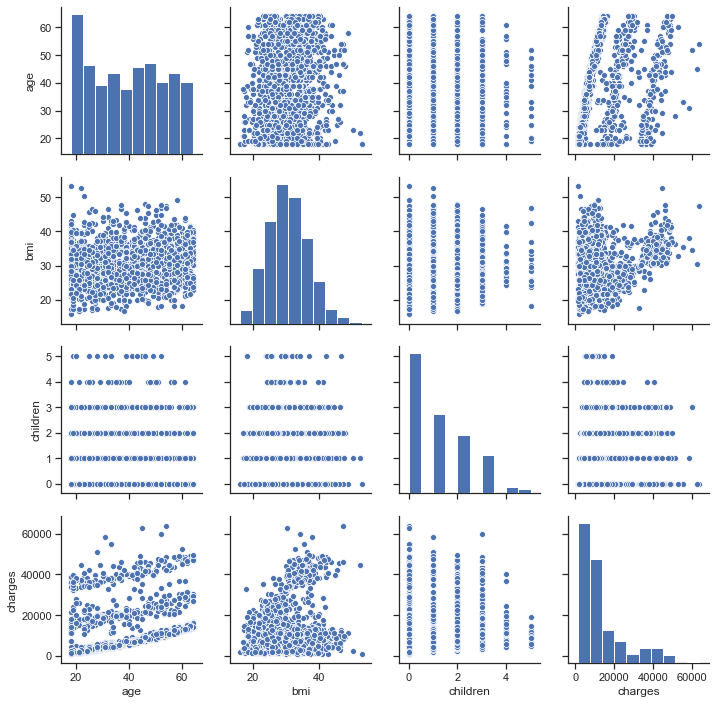

In [30]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data)

In [31]:
from sklearn import preprocessing
from scipy.stats import stats
le = preprocessing.LabelEncoder()
data['smoker'] = le.fit_transform(data['smoker'])
smoker = data[data['smoker']==1]
non_smoker = data[data['smoker']==0]
t_statistic, p_value = stats.ttest_ind(non_smoker['charges'], smoker['charges'], equal_var = False)
print("t_statistics:{}  p_value:{}".format(t_statistic,p_value))
print("since p_value is significantly low, hence we will reject null hypothesis which says mean of smoker and non-smoker is same")

t_statistics:-32.751887766341824  p_value:5.88946444671698e-103
since p_value is significantly low, hence we will reject null hypothesis which says mean of smoker and non-smoker is same


In [33]:
e = preprocessing.LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
male = data[data['sex']==1]
female = data[data['sex']==0]
t_statistic, p_value = stats.ttest_ind(male['bmi'], female['bmi'], equal_var = False)
print("t_statistics:{}  p_value:{}".format(t_statistic,p_value))
print("since p_value is higher than 5%, hence we fail to reject the null hypothesis i.e. bmi of male to female does not differ significantly")

t_statistics:1.697027933124022  p_value:0.08992430667834876
since p_value is higher than 5%, hence we fail to reject the null hypothesis i.e. bmi of male to female does not differ significantly


In [75]:
female_smoker = data[data['sex']==0].smoker.value_counts()[1]
male_smoker = data[data['sex']==1].smoker.value_counts()[1]
no_female = data[data['sex']==0].sex.value_counts()[0]
no_male = data[data['sex']==1].sex.value_counts()[1]
print(f'female smokers count {female_smoker}, male smokers count {male_smoker}')
print(f'number of female {no_female}, number of male {no_male}')

female smokers count 115, male smokers count 159
number of female 662, number of male 676


In [76]:
from statsmodels.stats.proportion import proportions_ztest
z_stats, p_value = proportions_ztest([female_smoker,male_smoker],[no_female, no_male])
print(p_value)
print('p-value is significantly lower than 5% hence we will reject null hypothesis i.e. the proportions are equal')

0.005324114164320532


In [90]:
women_with_2_or_less_children = data[data['children']!=3][['children','bmi']]

In [95]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('bmi ~ children', data = women_with_2_or_less_children).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)
print('p-value is significantly higher, hence we are failed to reject the null hypothesis i.e. bmi of women with different number of children is same.')

                sum_sq      df         F    PR(>F)
children     10.788741     1.0  0.285939  0.592935
Residual  44484.679639  1179.0       NaN       NaN
p-value is significantly higher, hence we are failed to reject the null hypothesis i.e. bmi of women with different number of children is same.
